In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
import locale

In [34]:
df = pd.read_csv("data.csv", sep=",")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [36]:
print("Total number of house sales records in the dataset:", len(df))

Total number of house sales records in the dataset: 4600


In [37]:
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [38]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [39]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

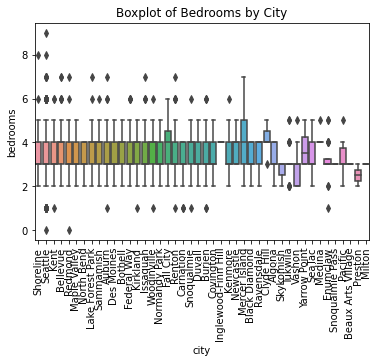

In [40]:
sns.boxplot(x='city', y='bedrooms', data=df)
plt.title('Boxplot of Bedrooms by City')
plt.xticks(rotation=90)
plt.show()

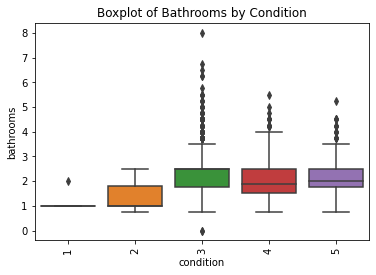

In [41]:
sns.boxplot(x='condition', y='bathrooms', data=df)
plt.title('Boxplot of Bathrooms by Condition')
plt.xticks(rotation=90)
plt.show()

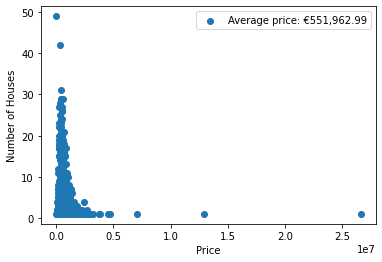

In [42]:
avg_price = df['price'].mean()

house_prices = df['price'].value_counts()

plt.scatter(house_prices.index, house_prices.values)
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.legend(["Average price: €{:,.2f}".format(avg_price)])
plt.show()

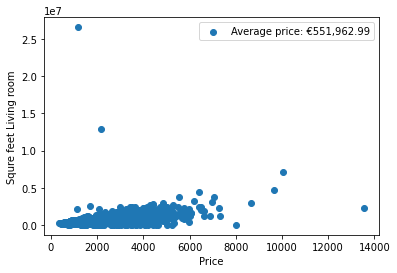

In [43]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel("Price")
plt.ylabel("Squre feet Living room")
plt.legend(["Average price: €{:,.2f}".format(avg_price)])
plt.show()

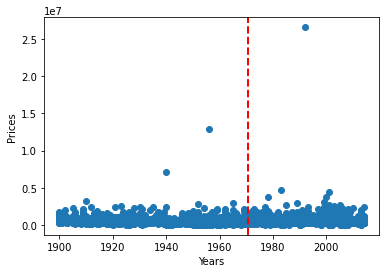

In [44]:
plt.scatter(df['yr_built'], df['price'])
plt.xlabel("Years")
plt.ylabel("Prices")
plt.axvline(df['yr_built'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

In [45]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(df[numeric_columns])
threshold = 3
print("Size before removing outliers:", df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df = df[(z_scores <= threshold).all(axis=1)]
print("Size after removing outliers:", df.shape)

Size before removing outliers: (4600, 18)
Size after removing outliers: (4244, 18)


In [46]:
outliers_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
56,2014-05-02 00:00:00,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968,1997,36850 204th Ave SE,Auburn,WA 98092,USA
100,2014-05-05 00:00:00,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000,0,17132 SE 100th St,Renton,WA 98059,USA
107,2014-05-05 00:00:00,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA
118,2014-05-05 00:00:00,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976,0,4529 135th Ave SE,Bellevue,WA 98006,USA


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4244 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4244 non-null   object 
 1   price          4244 non-null   float64
 2   bedrooms       4244 non-null   float64
 3   bathrooms      4244 non-null   float64
 4   sqft_living    4244 non-null   int64  
 5   sqft_lot       4244 non-null   int64  
 6   floors         4244 non-null   float64
 7   waterfront     4244 non-null   int64  
 8   view           4244 non-null   int64  
 9   condition      4244 non-null   int64  
 10  sqft_above     4244 non-null   int64  
 11  sqft_basement  4244 non-null   int64  
 12  yr_built       4244 non-null   int64  
 13  yr_renovated   4244 non-null   int64  
 14  street         4244 non-null   object 
 15  city           4244 non-null   object 
 16  statezip       4244 non-null   object 
 17  country        4244 non-null   object 
dtypes: float

In [49]:
import warnings
bedrooms=df['bedrooms'].value_counts()
bedrooms
import plotly.express as px
fig = px.pie(df, values='price', names='bedrooms')
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Program

Text(0, 0.5, 'Density')

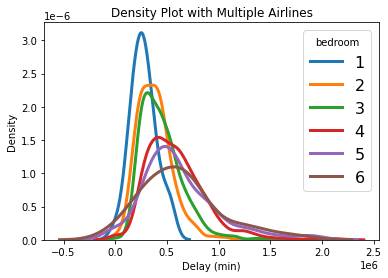

In [51]:
bed=[1,2,3,4,5,6]
for i in bed:
    subset = df[df['bedrooms'] == i]
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
plt.legend(prop={'size': 16}, title = 'bedroom')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')